In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool1D
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D

from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import regularizers

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GRU
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot

In [3]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

In [4]:
Final = pd.read_csv("Concatnated.csv")

In [5]:
Final.shape

(292986, 447)

In [6]:
Final = np.array(Final[:292000])
print(Final.shape)

(292000, 447)


In [7]:
Final = Final.reshape(-1,1000,Final.shape[1])
shuffle_idx = np.random.permutation(Final.shape[0])
Final = Final[shuffle_idx]

In [8]:
print('Old:', Final.shape)
Final = Final.reshape(292000, 447)
print('Updated:',Final.shape)

Old: (292, 1000, 447)
Updated: (292000, 447)


In [9]:
X = Final[:, :446]
y = Final[:,446]

In [10]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X.shape

(292000, 446)

In [11]:
pd.value_counts(y)

0.0    146493
1.0     48831
2.0     48831
3.0     47845
dtype: int64

In [12]:
'''X_trainX = []
y_trainX = []
strat_time = 0
timestamp = 10
length = len(Final)

for i in range(length):
    X_trainX.append(X[strat_time:timestamp, :446])
    y_trainX.append(y[timestamp])
    
    if timestamp >= 291999:
        break
    
    strat_time = strat_time + 1
    timestamp = timestamp + 1
print(len(X_trainX))
print(len(y_trainX))'''

'X_trainX = []\ny_trainX = []\nstrat_time = 0\ntimestamp = 10\nlength = len(Final)\n\nfor i in range(length):\n    X_trainX.append(X[strat_time:timestamp, :446])\n    y_trainX.append(y[timestamp])\n    \n    if timestamp >= 291999:\n        break\n    \n    strat_time = strat_time + 1\n    timestamp = timestamp + 1\nprint(len(X_trainX))\nprint(len(y_trainX))'

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [14]:
print(X_train.shape)
print(X_test.shape)

(277400, 446)
(14600, 446)


In [15]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
'''y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)'''

'y_train = to_categorical(y_train, 4)\ny_test = to_categorical(y_test, 4)'

In [17]:
print(y_train[0])
print(y_test[64])
print(y_train[2345])
print(y_test[97])

0.0
0.0
0.0
3.0


In [18]:
#Resape data into 3 dimention
X_train = np.reshape(X_train, (X_train.shape[0], 1, 446))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 446))

In [19]:
print(X_train[0])
print('\n')
print(y_train[0])

[[5.60092827e-07 1.14390469e-06 1.15201829e-06 2.93474997e-06
  9.83026836e-07 6.35673823e-06 2.45539574e-06 1.05940843e-06
  2.06556265e-06 3.78368338e-06 8.26565519e-07 5.30676104e-08
  9.30644096e-07 3.73882340e-06 2.79345377e-07 9.93941342e-06
  7.61858439e-07 1.24646083e-06 2.43793761e-07 6.32438457e-07
  4.66866086e-08 1.17695032e-06 4.28496773e-06 5.17671154e-06
  6.72579398e-06 1.76628269e-07 1.68593990e-05 2.41812195e-07
  4.41485380e-06 9.17182985e-08 2.43664004e-06 2.48109856e-06
  2.14722057e-06 2.97451688e-06 5.09621234e-06 4.30142218e-06
  2.03314761e-06 3.09143558e-08 9.34414436e-08 2.41371077e-06
  1.41945772e-06 8.44415342e-08 6.92836225e-09 1.12803761e-07
  4.46024226e-09 1.39126060e-08 1.01408554e-07 1.99971305e-07
  7.12008405e-07 7.09729839e-06 6.70927270e-07 9.62015823e-07
  1.48950627e-06 1.46612866e-06 4.32462480e-06 2.67675704e-08
  6.15167090e-06 1.58494434e-06 1.16003762e-06 7.00320605e-07
  3.41681903e-07 3.14045244e-07 3.80667944e-06 4.28282282e-06
  2.8724

In [54]:
model = Sequential()
model.add(GRU(128, activation='tanh', kernel_regularizer=regularizers.l2(0.00), 
               input_shape=(X_train.shape[1], X_train.shape[2]), 
               return_sequences=True))
model.add(GRU(64, activation='tanh', return_sequences=True))
model.add(GRU(32, activation='tanh', return_sequences=False))

model.add(RepeatVector(1))

model.add(GRU(32, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.add(GRU(64, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.add(GRU(128, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(X_train.shape[2])))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(metrics=['accuracy'],
                    loss='mse',
                    optimizer=optimizer)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 1, 128)            221184    
                                                                 
 gru_13 (GRU)                (None, 1, 64)             37248     
                                                                 
 gru_14 (GRU)                (None, 32)                9408      
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 32)            0         
 or)                                                             
                                                                 
 gru_15 (GRU)                (None, 1, 32)             6336      
                                                                 
 time_distributed_6 (TimeDis  (None, 1, 446)           14718     
 tributed)                                            

In [55]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="1autoencoder.h5",
                               mode='min', monitor='val_loss', verbose=0, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [56]:
history = model.fit(X_train, X_train,
                    epochs=150,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/150
2168/2168 [==============================] - 21s 8ms/step - loss: 0.0030 - accuracy: 0.0622 - val_loss: 0.0027 - val_accuracy: 0.0698
Epoch 2/150
2168/2168 [==============================] - 16s 7ms/step - loss: 0.0026 - accuracy: 0.0762 - val_loss: 0.0025 - val_accuracy: 0.0772
Epoch 3/150
2168/2168 [==============================] - 16s 7ms/step - loss: 0.0024 - accuracy: 0.0905 - val_loss: 0.0023 - val_accuracy: 0.1005
Epoch 4/150
2168/2168 [==============================] - 16s 7ms/step - loss: 0.0022 - accuracy: 0.1215 - val_loss: 0.0021 - val_accuracy: 0.1817
Epoch 5/150
2168/2168 [==============================] - 16s 7ms/step - loss: 0.0020 - accuracy: 0.1821 - val_loss: 0.0019 - val_accuracy: 0.2195
Epoch 6/150
2168/2168 [==============================] - 15s 7ms/step - loss: 0.0017 - accuracy: 0.2053 - val_loss: 0.0016 - val_accuracy: 0.1981
Epoch 7/150
2168/2168 [==============================] - 16s 7ms/step - loss: 0.0015 - accuracy: 0.2266 - val_loss: 0.0014 -

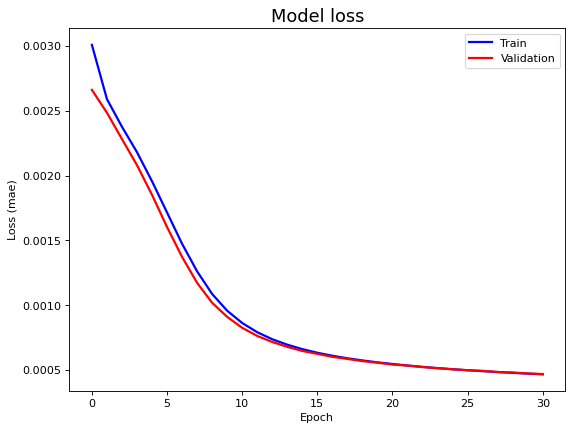

In [57]:
# plot the training losses
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(model.history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(model.history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [58]:
from keras.models import load_model
model = tf.keras.models.load_model("1autoencoder.h5")

In [59]:
test_x_predictions = model.predict(X_test)

In [60]:
X_test_reshape = np.reshape(X_test, (X_test.shape[0], 446))
pred_reshape = np.reshape(test_x_predictions, (test_x_predictions.shape[0], 446))
print(X_test_reshape.shape)
print(pred_reshape.shape)

(14600, 446)
(14600, 446)


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

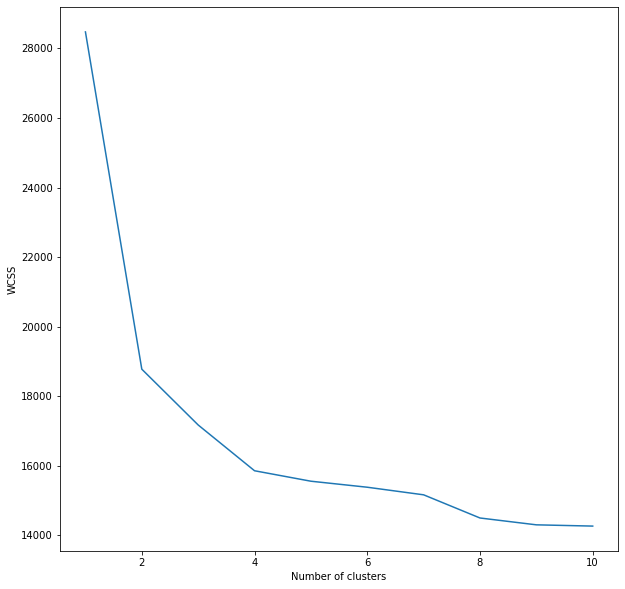

In [42]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(pred_reshape)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
pca = PCA(2)
data = pca.fit_transform(pred_reshape)

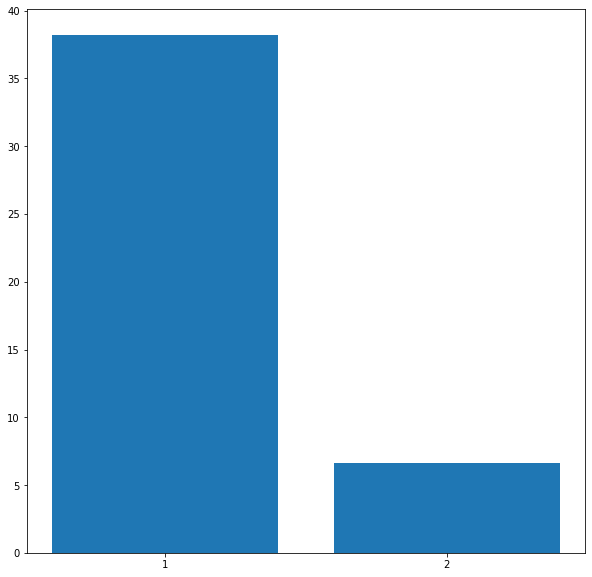

In [44]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

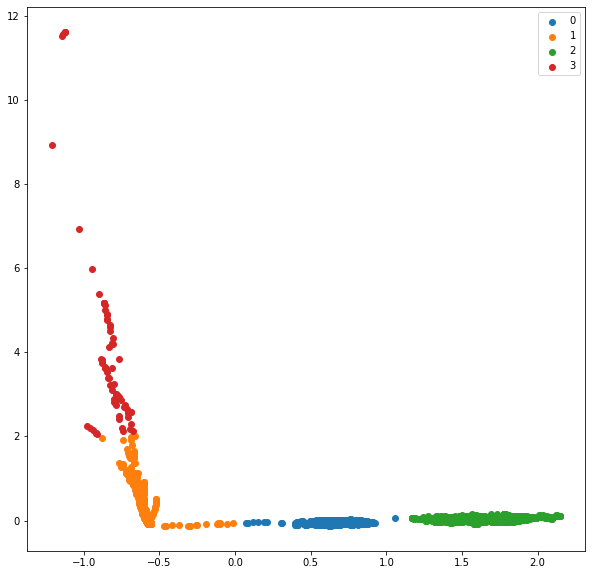

In [45]:
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)

#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [46]:
pd.value_counts(label)

1    9659
2    2464
0    2403
3      74
dtype: int64

Explained variance ratio (first two components): [0.3820966  0.06552975]


<Figure size 432x288 with 0 Axes>

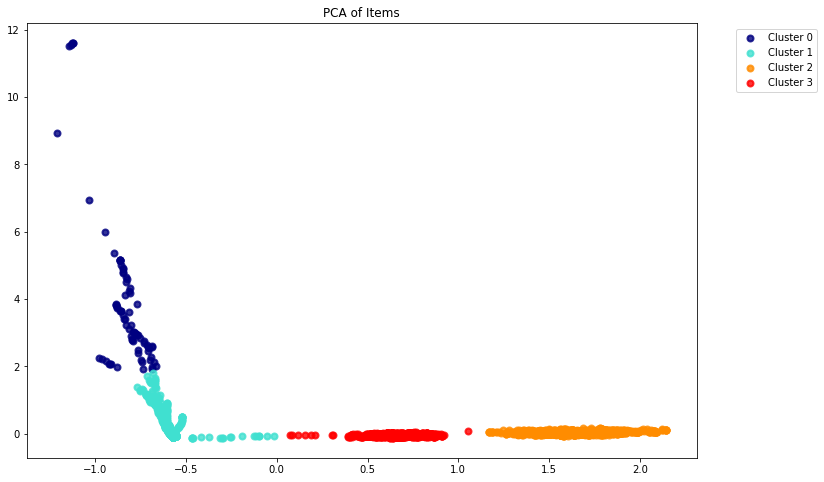

In [52]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(pred_reshape)

predictions = kmeans.predict(pred_reshape)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = pred_reshape
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

In [53]:
y_num

array([2, 2, 1, ..., 1, 3, 3])

C:\Users\Lisa\AppData\Local\Temp/ipykernel_11332/3599603030.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
C:\Users\Lisa\AppData\Local\Temp/ipykernel_11332/3599603030.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels.astype(np.float), edgecolor="k", s=50)
C:\Users\Lisa\anaconda3\l

Text(0.5, 0.92, 'K Means')

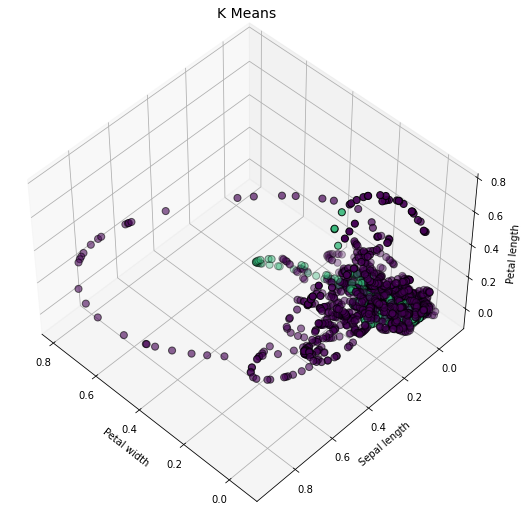

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
#Iris Dataset

X = pred_reshape
#KMeans
km = KMeans(n_clusters=4)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], X[:, 1],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

In [73]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model ,models, layers, optimizers, utils

# define input sequence
seq_in = np.array(X_train)

# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
#seq_in = seq_in.reshape((1, n_in, 1))

# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

# define encoder
visible = layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
encoder = layers.LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = layers.RepeatVector(n_in)(encoder)
decoder1 = layers.LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = layers.TimeDistributed(layers.Dense(1))(decoder1)
# define predict decoder
decoder2 = layers.RepeatVector(n_out)(encoder)
decoder2 = layers.LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = layers.TimeDistributed(layers.Dense(1))(decoder2)
# concat model
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')

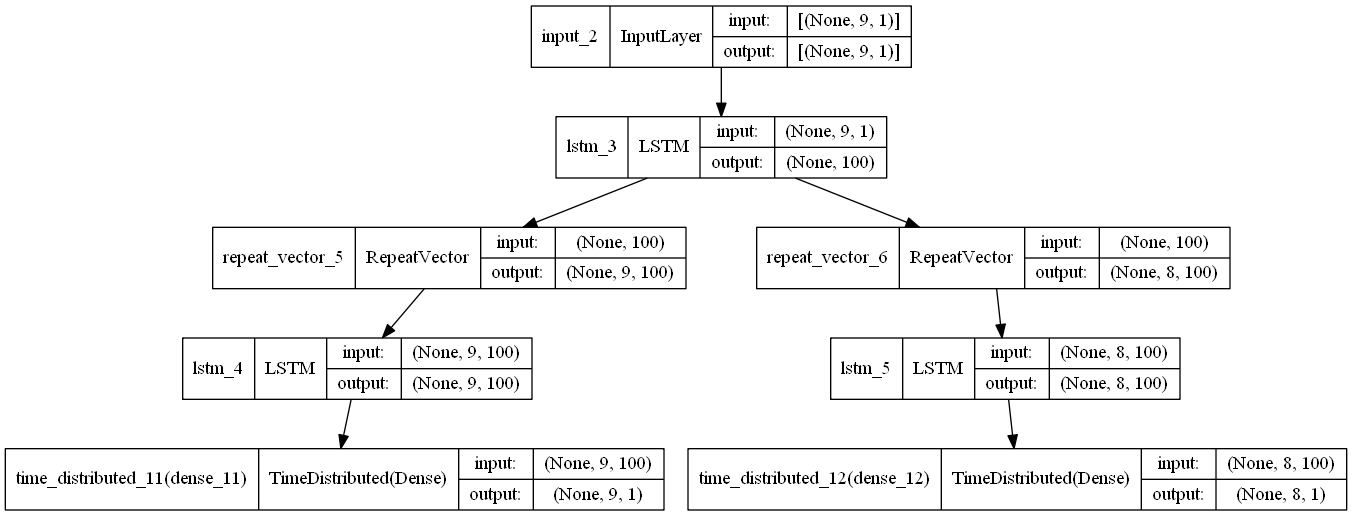

In [68]:
utils.plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')

In [74]:
# fit model 
model.fit(seq_in, [seq_in, seq_out], epochs=300, verbose=1)

Epoch 1/300


ValueError: in user code:

    File "C:\Users\Lisa\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Lisa\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Lisa\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Lisa\anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\Lisa\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Lisa\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Lisa\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Lisa\anaconda3\lib\site-packages\keras\losses.py", line 1204, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 277399 and 0 for '{{node mean_squared_error_1/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](model_2/time_distributed_14/Reshape_1, IteratorGetNext:2)' with input shapes: [?,277399,1], [?,0,446].


In [71]:
# predict
yhat = model.predict(seq_in)

In [72]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(pred_reshape)

predictions = kmeans.predict(pred_reshape)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = pred_reshape
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1) + inhomogeneous part.

In [75]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model ,models, layers, optimizers, utils

In [85]:
# define input sequence
seq_in = np.array(X_test)
seq_in.shape

(14600, 1, 446)

In [90]:
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = np.reshape(seq_in, (seq_in.shape[0], 1, 446, 1))

seq_in.shape

(14600, 1, 446, 1)

In [91]:
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

In [92]:
seq_out

array([], shape=(14600, 0, 446, 1), dtype=float64)

In [93]:
n_out

14599

In [82]:
n_out

8

In [77]:
# define encoder
visible = layers.Input(shape=(n_in, 1))
encoder = layers.LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = layers.RepeatVector(n_in)(encoder)
decoder1 = layers.LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = layers.TimeDistributed(layers.Dense(1))(decoder1)
# define predict decoder
decoder2 = layers.RepeatVector(n_out)(encoder)
decoder2 = layers.LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = layers.TimeDistributed(layers.Dense(1))(decoder2)

In [ ]:
# concat model
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
# utils.plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')

# fit model 
model.fit(seq_in, [seq_in, seq_out], epochs=300, verbose=0)

# predict
yhat = model.predict(seq_in)
yhat